# Mengukur Performa Penjualan Ritel Online

# 1. Dataset Information
Dataset ini digunakan untuk menganalisis bagaimana performa penjualan dalam kurung 3 tahun terakhir.
<br><br>
**Attribute Information**
- Invoice : Nomor invoice 6 digit yang ditetapkan secara unik untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'C'. itu menunjukan pembatalan
- StockCode : Kode produk(barang). Angka 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda
- Description : Nama produk
- Quantity : Jumlah kuantitas setiap produk per transaksi
- InvoiceDate : Tanggal dan waktu invoice, yaitu hari dan waktu saat transaksi dibuat
- UnitPrice : Harga satuan atau harga produk per unit dalam sterling
CustomerID : Nomor 5 digit yang ditetapkan secara unik setiap pelanggan
- Country : Nama negara temapt tinggal pelanggan

# 2. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Dataset Overview

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



MessageError: ignored

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/sukma/online_retail_II.csv')
data


## Section 1

### Create New Feature: Year

In [ ]:
pd.to_datetime(data['InvoiceDate']) #ubah tipe data InvoiceDate ke datetime

data["Year"]= pd.DatetimeIndex(data['InvoiceDate']).year #Gunakan function dari library pandas untuk mendapatkan tahun dari kolom InvoiceDate



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

Buat filtering data dengan ketentuan di bawah ini dan simpan dalam variabel baru,
misalnya sales
- Quantity minimal 1 (tidak boleh 0 dan minus)
- Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan
pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan.

In [ ]:
Data_Quantity_Minimal_NoC_Invoice = data[(data['Quantity'] >= 1) & (~data['Invoice'].str.contains("C"))].reset_index() #Filtering Quantity dan Kolom Invoice tidak mengandung huruf ‘C’
Data_Quantity_Minimal_NoC_Invoice


,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...,...
1044415,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1044416,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1044417,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1044418,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue




Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price

In [ ]:
Data_Quantity_Minimal_NoC_Invoice["Revenue"] = Data_Quantity_Minimal_NoC_Invoice["Quantity"] * Data_Quantity_Minimal_NoC_Invoice["Price"] #Buat kolom baru bernama Revenue

Data_Quantity_Minimal_NoC_Invoice


,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1044415,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1044416,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044417,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044418,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year
Hitung rata-rata Revenue per tahun

In [ ]:
rerata_revenue=Data_Quantity_Minimal_NoC_Invoice.groupby('Year').mean().reset_index()
rerata_revenue #rata-rata Revenue per tahun

<ipython-input-13-5300c70d2b1d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rerata_revenue=Data_Quantity_Minimal_NoC_Invoice.groupby('Year').mean().reset_index()


,Year,index,Quantity,Price,Customer ID,Revenue
0,2009,22610.203363,10.104957,4.256300,15479.710055,18.713273
1,2010,307198.158621,11.607816,4.015408,15370.439337,19.908987
2,2011,818004.041538,10.822372,3.777422,15277.787842,20.058767


<Axes: xlabel='Year', ylabel='Revenue'>

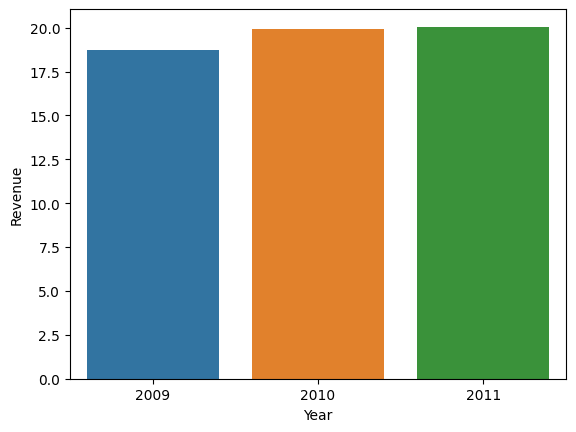

In [ ]:
sns.barplot(x="Year", y="Revenue", data=rerata_revenue) #visualisasi

### Interpretation

Interpretation

Rata-rata revenue penjualan ritel online setiap tahun mengalami kenaikan yaitu sebesar 18.713273 pada tahun 2009 kemudian pada tahun 2010 mengalami kenaikan lagi sebesar 1.195714 menjadi 19.908987 dan meningkat lagi pada tahun 2011 menjadi 20.058767. Pertumbuhan penjualan ritel online tertinggi terjadi pada tahun 2010 sedangkan penjualan terendah terjadi pada tahun 2011 yang dapat dilihat dari nilai rata-rata revenue

## Section 2

### Filtering Data

#### Customers who finished their purchases
Lakukan filtering menggunakan data sales (data yang sudah di filter pada section 1)
dengan ketentuan CustomerID tidak boleh kosong atau null. Kemudian simpan dalam
variabel finished.

In [ ]:
data_sales = Data_Quantity_Minimal_NoC_Invoice
finished = data_sales[data_sales[['Customer ID']].notnull().all(1)].reset_index()
finished

,level_0,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...
805615,1044415,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
805616,1044416,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
805617,1044417,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
805618,1044418,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases
Lakukan filtering data untuk mengelompokkan pelanggan yang membatalkan
belanjanya, dengan cara mendeteksi kolom Invoice mengandung huruf ‘C’. Kemudian
simpan dalam variabel baru bernama cance

In [ ]:
cancel = data[(data['Invoice'].str.contains("C"))].reset_index()
cancel #deteksi kolom Invoice mengandung huruf ‘C’.



,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
1,179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
2,180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
3,181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
4,182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...,...
19489,1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
19490,1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
19491,1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
19492,1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year
Hitung jumlah transaksi yang berhasil (dari variabel finished) dan jumlah transaksi yang
dibatalkan (dari variabel cancel) untuk setiap tahunnya. Lalu buatlah visualisasinya
(grafik)

In [ ]:
total_finished = finished.groupby('Year').count().reset_index()
total_finished.columns = total_finished.columns.str.replace('Invoice', 'Finished Transaction')
total_finished # total transaksi yang berhasil

,Year,level_0,index,Finished Transaction,StockCode,Description,Quantity,Finished TransactionDate,Price,Customer ID,Country,Revenue
0,2009,30761,30761,30761,30761,30761,30761,30761,30761,30761,30761,30761
1,2010,403094,403094,403094,403094,403094,403094,403094,403094,403094,403094,403094
2,2011,371765,371765,371765,371765,371765,371765,371765,371765,371765,371765,371765


In [ ]:
total_cancel = cancel.groupby('Year').count().reset_index()
total_cancel.columns = total_cancel.columns.str.replace('Invoice', 'Cancel Transaction')
total_cancel # total transaksi yang gagal

,Year,index,Cancel Transaction,StockCode,Description,Quantity,Cancel TransactionDate,Price,Customer ID,Country
0,2009,1015,1015,1015,1015,1015,1015,1015,999,1015
1,2010,9919,9919,9919,9919,9919,9919,9919,9530,9919
2,2011,8560,8560,8560,8560,8560,8560,8560,8215,8560


In [ ]:
finished_ = total_finished[["Year","Finished Transaction"]] #transaksi yang berhasil
cancel_ = total_cancel[["Year","Cancel Transaction"]]  #transaksi yang gagal
merged_df = pd.merge(finished_,cancel_)
merged_df

,Year,Finished Transaction,Cancel Transaction
0,2009,30761,1015
1,2010,403094,9919
2,2011,371765,8560


<Axes: xlabel='Year', ylabel='Finished Transaction'>

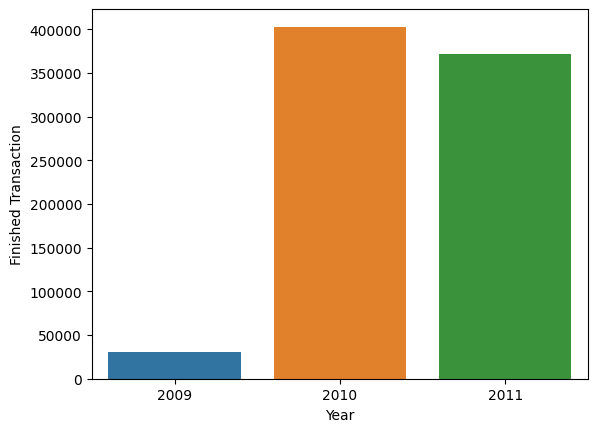

In [ ]:
sns.barplot(x="Year", y="Finished Transaction", data=merged_df) #visualisasi transaksi yang berhasil pertahun

<Axes: xlabel='Year', ylabel='Cancel Transaction'>

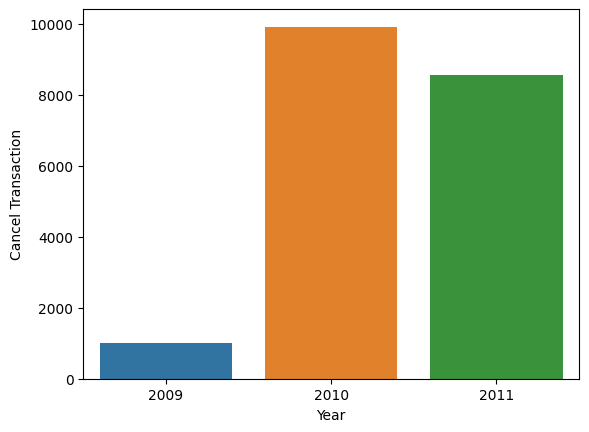

In [ ]:
sns.barplot(x="Year", y="Cancel Transaction", data=merged_df) #visualisai transaksi yang gagal pertahun

### Cancellation Rate
Hitung cancellation rate untuk setiap tahunnya.
Cancellation rate adalah persentase pelanggan yang melakukan pembatalan order
yang telah dilakukan. Formulanya adalah jumlah customer yang cancel dibagi jumlah
seluruh customer kemudian dikali 100%

In [ ]:
#Definisi variabel jumlah costumer yang melakukan pembatalan per tahun --> terdapat beberapa customer dengan ID yang sama melakukan pembatalan sehingga menggunakan fuction nunique()
cancelID = cancel.groupby("Year").count()
Cancel_ID_2009 = cancelID['Invoice'].iloc[[0]]
Cancel_ID_2010 = cancelID['Invoice'].iloc[[1]]
Cancel_ID_2011 = cancelID['Invoice'].iloc[[2]]
Cancel_ID_2009, Cancel_ID_2010,Cancel_ID_2011



(Year
 2009    1015
 Name: Invoice, dtype: int64,
 Year
 2010    9919
 Name: Invoice, dtype: int64,
 Year
 2011    8560
 Name: Invoice, dtype: int64)

In [ ]:
#Definisi variabel semua jumlah costumer yang melakukan transaksi baik yg valid atau batal --> terdapat beberapa customer dengan ID yang sama sehingga menggunakan fuction nunique()
semuaID = data.groupby("Year").count()
Semua_ID_2009 = semuaID['Invoice'].iloc[[0]]
Semua_ID_2010 = semuaID['Invoice'].iloc[[1]]
Semua_ID_2011 = semuaID['Invoice'].iloc[[2]]
Semua_ID_2009,Semua_ID_2010,Semua_ID_2011



(Year
 2009    45228
 Name: Invoice, dtype: int64,
 Year
 2010    522714
 Name: Invoice, dtype: int64,
 Year
 2011    499429
 Name: Invoice, dtype: int64)

In [ ]:
#operasi / perhitungan Cancellation_rate
Cancellation_rate_2009 = (Cancel_ID_2009/Semua_ID_2009)*100
Cancellation_rate_2010 = (Cancel_ID_2010/Semua_ID_2010)*100
Cancellation_rate_2011 = (Cancel_ID_2011/Semua_ID_2011)*100

In [ ]:
Cancellation_rate = pd.concat([Cancellation_rate_2009,Cancellation_rate_2010,Cancellation_rate_2011]) #menggabungkan 3 variabel Cancellation_rate dalam 1 dataframe
Cancellation_rate = Cancellation_rate.reset_index()
Cancellation_rate



,Year,Invoice
0,2009,2.244185
1,2010,1.897596
2,2011,1.713957


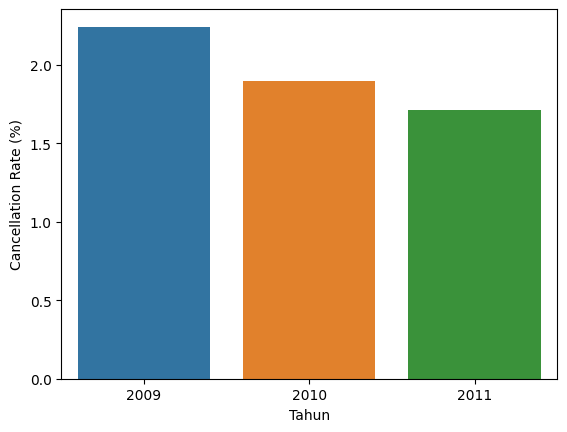

In [ ]:
ax = sns.barplot(x="Year", y="Invoice", data=Cancellation_rate) #Visualisasi Cancellation_rate pertahun
ax.set(xlabel='Tahun', ylabel='Cancellation Rate (%)')
plt.show()



### Interpretation

Performa penjualan ritel online dalam kurun waktu 3 tahun terakhir, untuk Finished Transaction mengalami kenaikan cukup tajam pada tahun 2010, namun mengalami penurunan kembali pada tahun 2011 walau tak terlalu tajam. Sedangkan untuk Cancel Transaction juga mengalami lonjakan yang cukup tajam pada tahun 2010, walaupun kembali turun sedikit pada tahun 2011. Cancellation Rate per tahun mengalami tren penurunan dari tahun 2009 sampai 2011 dimana hal ini merupakan hal yang baik bagi perusahaan. Namun dilain sisi Finished Transaction pada tahun 2011 mengalami tren menurun.